<a href="https://colab.research.google.com/github/kkimyunjoo/24-2-ESAA/blob/main/0906_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **핸즈온 Ch 4. 모델 훈련**

p.157-203

**[4.1 선형 회귀]**

- 입력 특성의 가중치 합과 편향(또는 절편)이라는 상수를 더해 예측을 만듬.
- RMSE를 최소화하는 θ를 찾아야함.

4.1.1 정규 방정식
- 비용 함수를 최소화하는 θ를 찾는 공식

In [1]:
import numpy as np

X = 2*np.random.rand(100,1)
y = 4 + 3*X + np.random.rand(100,1)

In [2]:
X_b = np.c_[np.ones((100,1)),X]  #모든 샘플에 x0 = 1을 추가합니다.
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [3]:
theta_best

array([[4.60276423],
       [2.85419202]])

-> 잡음 때문에 원래 함수의 파라미터를 정확하게 재현하지 못함.

In [4]:
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)), X_new]  # 모든 샘플에 X0 = 1을 추가합니다.
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 4.60276423],
       [10.31114827]])

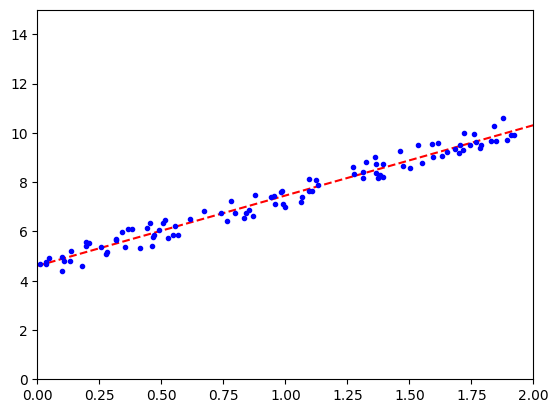

In [5]:
import matplotlib.pyplot as plt

plt.plot(X_new, y_predict, 'r--')
plt.plot(X,y, 'b.')
plt.axis([0,2,0,15])
plt.show()

In [6]:
#사이킷런에서의 선형 회귀
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y)
lin_reg.intercept_, lin_reg.coef_

(array([4.60276423]), array([[2.85419202]]))

In [7]:
lin_reg.predict(X_new)

array([[ 4.60276423],
       [10.31114827]])

- LinearRegression 클래스: scipy.linalg.lstsq() 함수 기반

In [8]:
theta_best_svd, residuals,rank, s = np.linalg.lstsq(X_b, y, rcond = 1e-6)
theta_best_svd

array([[4.60276423],
       [2.85419202]])

- 유사역행렬: 특잇값분해(SVD)라 부르는 표준 행렬 분해 기법을 사용해 계산됨.
  - SVD: 훈련 세트 X를 3개의 행렬 곱셈으로 분해
    - 극단적인 경우도 처리 가능(정규방정식이 작동하지 않는 경우에도 유사역행렬은 항상 구할 수 있음.)

In [9]:
np.linalg.pinv(X_b).dot(y)

array([[4.60276423],
       [2.85419202]])

4.1.2 계산 복잡도
- 사이킷런의 LinearRegression 클래스가 사용하는 SVD 방법: 특성의 개수가 두 배로 늘어나면 계산 시간이 대략 4배가 됨.
- 예측 계산 복잡도는 샘플 수와 특성 수에 선형적임.


[4.2 경사 하강법]
- 경사 하강법: 비용 함수를 최소화하기 위해 반복해서 파라미터를 조정해가는 것 -> 파라미터 벡터 θ에 대해 비용 함수의 편재 그레디언트를 계산하고 그레디언트가 감소하는 방향으로 진행
  - 스텝의 크기: 학습률 하이퍼파라미터로 결정됨.
  - 문제점
    - 무작위 초기화 때문에 알고리즘이 왼쪽에서 시작하면 전역 최솟값보다 덜 좋은 지역 최솟값에 수렴함.
    - 오른쪽에서 시작하면 평탄한 지역을 지나기 위해 시간이 오래 걸리고 일찍 멈추게 되어 전역 최솟값에 도달하지 못함.
  - MSE 비용 함수: 볼록 함수 -> 지역 최솟값이 없고 하나의 전역 최솟값만 있음. -> 경사 하강법이 전역 최솟값에 가깝게 접근할 수 있다는 것을 보장함.

  4.2.1 배치 경사 하강법
  - 편도함수: θ가 조금 변경될 때 비용 함수가 얼마나 바뀌는지 계산하는 함수(비용 함수의 그레디언트를 계산하기 위한)

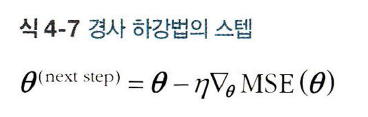

In [10]:
#알고리즘으로 구현
eta = 0.1   # 학습률
n_iterations = 1000
m = 100

theta = np.random.randn(2,1)  # 무작위 초기화

for iternation in range(n_iterations) :
  gradients = 2/m * X_b.T.dot(X_b.dot(theta)-y)
  theta = theta - eta * gradients

In [11]:
theta

array([[4.60276423],
       [2.85419202]])

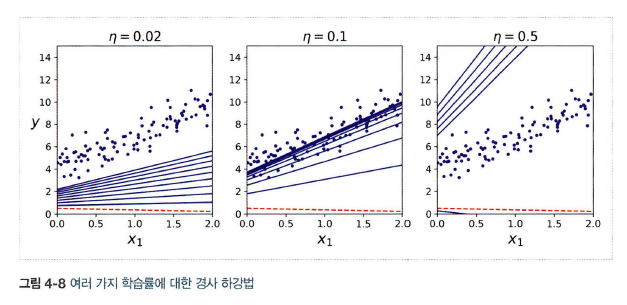


4.2.2 확률적 경사 하강법
- 확률적 경사 하강법: 매 스텝에서 한 개의 샘플을 무작위로 선택하고 그 하나의 샘플에 대한 그레디언트를 계산함.
  - 알고리즘의 속도가 빠르고, 매우 큰 훈련 세트도 훈련시킬 수 있음.
  - 확률적이기 때문에 배치 경사 하강법보다 훨씬 불안정함.

In [12]:
n_epochs = 50
t0, t1 = 5, 50  # 학습 스케줄 하이퍼파라미터

def learning_schedule(t):
  return t0 / (t + t1)

theta = np.random.randn(2,1)  # 무작위 초기화

for epoch in range(n_epochs):
  for i in range(m) :
    random_index = np.random.randint(m)
    xi = X_b[random_index:random_index+1]
    yi = y[random_index:random_index+1]
    gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
    eta = learning_schedule(epoch * m + i)
    theta = theta - eta * gradients

-> 일반적으로 한 반복에서 m번 되풀이 되고, 각 반복을 epoch라 함.

In [13]:
theta

array([[4.61104163],
       [2.84294078]])

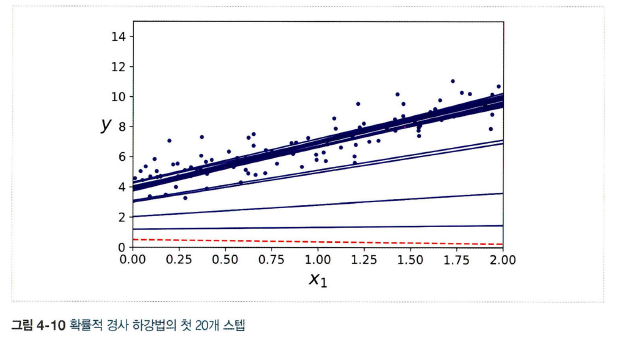

In [14]:
#SGDRegressor 클래스 사용
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter = 1000, tol = 1e-3, penalty = None, eta0 = 0.1)
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, penalty=None)

4.2.3 미니배치 경사 하강법
- 미니배치라 부르는 임이의 작은 샘플 세트에 대해 그레디언트를 계산함.
  - 확률적 경사 하강법에 비한 주요 장점: 행렬 연산에 최적화된 하드웨어, 특히 GPU를 사용해서 얻는 성능 향상

- 선형 회귀를 사용한 알고리즘 비교

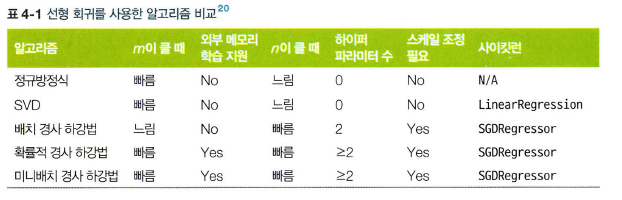

**[4.3 다항 회귀]**
- 다항 회귀: 각 특성의 거듭제곱을 새로운 특성으로 추가하고, 이 확장된 특성을 포함한 데이터셋에 선형 모델을 훈련시키는 것

In [15]:
m = 100
X = 6 * np.random.rand(m,1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m,1)

- PolynomialFeatures를 이용해 훈련 데이터 변환하기
  - 훈련 세트에 있는 각 특성을 제곱하여 새로운 특성으로 추가

In [16]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias = False)
X_poly = poly_features.fit_transform(X)
X[0]

array([0.65460936])

In [17]:
X_poly[0]

array([0.65460936, 0.42851342])

-> X_poly는 원래 특성 X와 이 특성의 제곱을 포함.

In [18]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([2.11876999]), array([[1.03672859, 0.48665776]]))

**[4.4 학습 곡선]**
- 학습 곡선: 훈련 세트와 검증 세트의 모델 성능을 훈련 세트 크기의 함수로 나타냄
  - 훈련 세트에서 크기가 다른 서브 세트를 만들어 모델 여러 번 훈련시키기

In [19]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model,X,y):
  X_train, X_val, y_train, y_val = train_test_split(X,y,test_size = 0.2)
  train_errors, val_errors = [],[]
  for m in range(1, len(X_train)):
    model.fit(X_train[:m], y_train[:m])
    y_train_predict = model.predict(X_train[:m])
    y_val_predict = model.predict(X_val)
    train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
    val_errors.append(mean_squared_error(y_val, y_val_predict))
  plt.plot(np.sqrt(train_errors), 'r-+', linewidth=2, label = 'train set')
  plt.plot(np.sqrt(val_errors), 'b--', linewidth=3, label = 'test set')
  plt.ylim(0,3)
  plt.legend()
  plt.show()

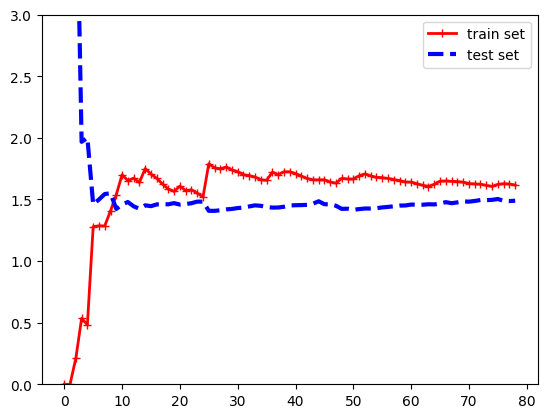

In [20]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X,y)

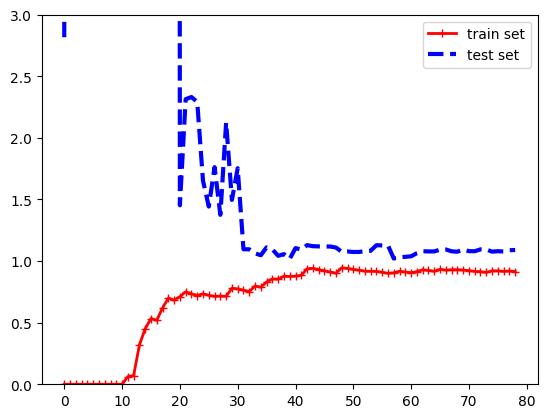

In [21]:
#10차 다항 회귀 모델의 학습곡선
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
    ('poly_features', PolynomialFeatures(degree=10, include_bias = False)),
    ('lin_reg', LinearRegression())
])

plot_learning_curves(polynomial_regression, X, y)

- 훈련 데이터의 오차가 선형 회귀 모델보다 훨씬 낮음.
- 두 곡선 사이에 공간이 존재: 훈련 데이터에서의 모델 성능이 검증 데이터에서보디 훨씬 낫다는 뜻이고, 이는 과대적합 모델의 특징임 -> 더 큰 훈련 세트를 사용하면 두 곡선이 점점 가까워짐.

**[4.5 규제가 있는 선형 모델]**

4.5.1 릿지 회귀
- 규제항이 비용 함수에 추가되며, 이는 학습 알고리즘을 데이터에 맞추는 것 뿐만 아니라 모델의 가중치가 가능한 한 작게 유지되도록 함.
- 규제항은 훈련하는 동안에만 비용 함수에 추가되며, 모델의 훈련이 끝나면 모데르이 성능을 규제가 없는 성능 지표로 평가함.

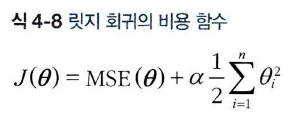

- 하이퍼 파라미터 alpha: 모델을 얼마나 많이 규제할지 조절
  - alpha=0: 선형 회귀와 동일해짐.
  - alpha 가 아주 큰 경우: 모든 가중치가 거의 0에 가까워지고 결국 데이터의 평균을 지나는 수평성이 됨.

In [22]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha = 1, solver = 'cholesky')
ridge_reg.fit(X,y)
ridge_reg.predict([[1.5]])

array([[5.08189682]])

In [23]:
#확률적 경사 하강법
sgd_reg = SGDRegressor(penalty = 'l2')
sgd_reg.fit(X,y.ravel())
sgd_reg.predict([[1.5]])

array([5.0813312])

4.5.2 라쏘 회귀

- 덜 중요한 특성의 가중치를 제거하려고 함-> 자동으로 특성 선택을 하고 희소 모델을 만듬.

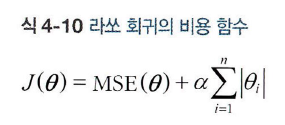

- 라쏘와의 차이점
  - 파라미터가 전역 최적점에 가까워질수록 그레디언트가 작아짐. -> 경사 하강법이 자동으로 느려지고 수렴에 도움이 됨.
  - alpha 를 증가시킬수록 최적의 파라미더가 원점에 더 가까워짐.(완전히 0이 되지는 않음.)

In [24]:
from sklearn.linear_model import Lasso
lasso_reg  = Lasso(alpha = 0.1)
lasso_reg.fit(X,y)
lasso_reg.predict([[1.5]])

array([5.03524103])

4.5.3 엘라스틱넷
- 엘라스틱넷: 릿지 회귀와 라쏘 회귀를 절충한 모델
  - 규제항: 릿지와 회귀의 규제항을 단순히 더해서 사용하며, 혼합 정도는 혼합 비율을 사용해 조절함.

  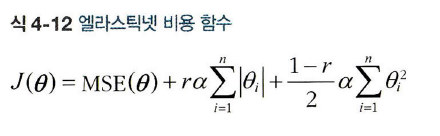

  - 특성 수가 훈련 샘플 수보다 많거나 특성 몇 개가 강하게 연관되어 있을 때는 라쏘보다 엘라스틱넷을 선호함.

In [25]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha = 0.1, l1_ratio = 0.5)
elastic_net.fit(X,y)
elastic_net.predict([[1.5]])

array([5.03563715])

4.5.4 조기 종료
- 조기 종료: 검증 에러가 최솟값에 도달하면 바로 훈련을 중지시키는 것

In [26]:
from sklearn.base import clone
from sklearn.preprocessing import StandardScaler

# 데이터 준비
poly_scaler = Pipeline([
    ('poly_features', PolynomialFeatures(degree=90, include_bias = False)),
    ('std_scaler', StandardScaler())
])

X_train, X_val, y_train, y_val = train_test_split(X,y, test_size=0.2)
X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(max_iter=1, tol=None, warm_start=True,
                       penalty=None, learning_rate="constant", eta0=0.0005)

minimum_val_error = float('inf')
best_epoch = None
best_model = None
for epoch in range(1000):
  sgd_reg.fit(X_train_poly_scaled,y_train.ravel())   # 훈련을 이어서 진행합니다.
  y_val_predict = sgd_reg.predict(X_val_poly_scaled)
  val_error = mean_squared_error(y_val, y_val_predict)
  if val_error < minimum_val_error:
    minimum_val_error = val_error
    best_epoch = epoch
    best_model = clone(sgd_reg)


**[4.6 로지스틱 회귀]**

4.6.1 확률 추정
- 선형 회귀 모델과 같이 입력 특성의 가중치 합을 계산하고 편향을 더한 뒤, 선형 회귀모델과 달리 결과값의 로지스틱을 출력함.
- 로지스틱 회귀 모델이 샘플 x가 양성 클래스에 속할 확률을 추정하면 이에 대한 예측 yhat을 쉽게 구할 수 있음.

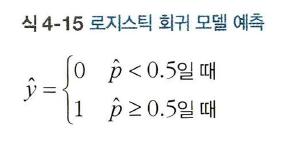

4.6.2 훈련과 비용 함수

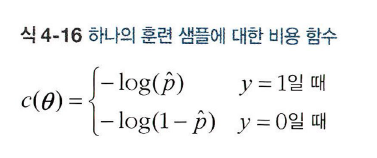

- 양성 샘플(y=1)에 대해서는 높은 확률 추정, 음성 샘플(y=0)에 대해서는 낮은 확률 추정을 하는 파라미터를 찾기

4.6.3 결정 경계

In [27]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [29]:
X = iris['data'][:,3:]  # 꽃잎의 너비
y = (iris["target"]==2).astype(int)  # 1 Iris-Virginica면 1, 그렇지 않으면 0

In [30]:
#로지스틱 회귀 모델 훈련
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X,y)

LogisticRegression()

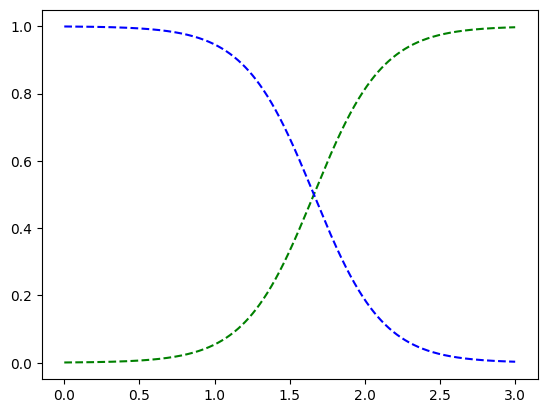

In [31]:
#꽃잎의 너비가 0~3cm인 꽃에 대해 모델의 추정 확률 계산
X_new = np.linspace(0,3,1000).reshape(-1,1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:, 1], 'g--', label = 'Iris virinica')
plt.plot(X_new, y_proba[:,0], 'b--', label = "Not Iris virginica")

In [32]:
log_reg.predict([[1.7],[1.5]])

array([1, 0])

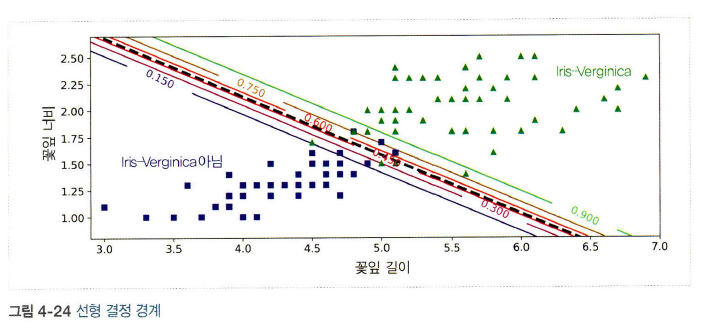

4.6.4 소프트맥스 회귀(다항 로지스틱 회귀)
- 여러 개의 이진 분류기를 훈련시켜 연결하지 않고 직접 다중 클래스를 지원하도록 일반화할 수 있음.
- 샘플 x가 주어지면 먼저 소프르 맥스 회귀 모델이 각 클래사 k에 대한 점수를 계산하고, 그 점수에 소프트맥스 함수를 적용하여 각 클래스의 확률을 추정하는 방법
- 각 클래스는 자신만의 파라미터 벡터가 있으며, 이 벡터는 파라미터 행렬에 행으로 저장됨.
- 모델이 타깃 클래스에 대해서는 높은 확률을 추정하도록 만드는 것이 목적
  - 크로스 엔트로피 비용 함수를 최소화

In [33]:
X = iris['data'][:, (2,3)]  # 꽃잎 길이, 꽃잎 너비
y = iris['target']

softmax_reg = LogisticRegression(multi_class ='multinomial', solver='lbfgs', C=10)
softmax_reg.fit(X,y)

LogisticRegression(C=10, multi_class='multinomial')

In [34]:
softmax_reg.predict([[5,2]])

array([2])

In [35]:
softmax_reg.predict_proba([[5,2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])

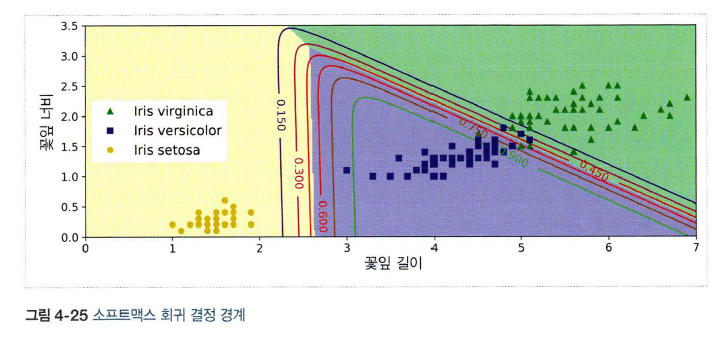